In [3]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from citipy import citipy
import hvplot.pandas
import geoviews as gv
from geoviews import opts
from geoviews import dim, output
from holoviews import dim


# Directly assign the API key
weather_api_key = "34016429845e046bea96c68439fce766"

# Generate random geographic coordinates
lat_lngs = []
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citipy
cities = []
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Check the number of cities
print(f"Number of unique cities: {len(cities)}")


Number of unique cities: 582


In [13]:

# Define base URL for OpenWeatherMap API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create an empty list to hold the weather data
weather_data = []

# Loop through each city and get the weather data
for city in cities:
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    response = requests.get(query_url).json()
    
    try:
        weather_data.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    except KeyError:
        # Skip the city if data is missing
        print(f"City not found. Skipping {city}")

# Convert the weather_data list into a DataFrame
city_data_df = pd.DataFrame(weather_data)

# Display the first few rows
city_data_df.head()


City not found. Skipping isle of lewis
City not found. Skipping taiohae
City not found. Skipping tranovaho
City not found. Skipping suai
City not found. Skipping kazalinsk
City not found. Skipping vingt cinq
City not found. Skipping puerto san carlos
City not found. Skipping fuvahmulah
City not found. Skipping am djarass
City not found. Skipping ocean pointe
City not found. Skipping ahau
City not found. Skipping gueltat zemmour
City not found. Skipping baluntaicun
City not found. Skipping ranohira
City not found. Skipping mukah
City not found. Skipping hihifo
City not found. Skipping shangri-la
City not found. Skipping tobi village
City not found. Skipping 'ohonua
City not found. Skipping hayma'


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hashtrud,37.4779,47.0508,19.56,59,0,2.25,IR,1723177588
1,isafjordur,66.0755,-23.1240,5.27,95,100,3.34,IS,1723177588
2,portland,45.5234,-122.6762,28.46,56,40,4.12,US,1723177500
3,blenheim,-41.5160,173.9528,12.51,75,95,2.24,NZ,1723177588
4,udachny,66.4167,112.4000,12.66,69,99,4.73,RU,1723177453


In [11]:
# Example: Counting skipped cities
skipped_cities = []

for city in cities:
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    response = requests.get(query_url).json()
    
    try:
        weather_data.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    except KeyError:
        print(f"City not found. Skipping {city}")
        skipped_cities.append(city)

# Display the number of skipped cities
print(f"Total cities skipped: {len(skipped_cities)}")


City not found. Skipping qapqal
City not found. Skipping ouellah
City not found. Skipping maubara
City not found. Skipping puerto san carlos
City not found. Skipping inekar
City not found. Skipping toga village
City not found. Skipping cargados carajos
City not found. Skipping costa teguise
City not found. Skipping ijuw
City not found. Skipping taiohae
City not found. Skipping tranovaho
City not found. Skipping port glaud
City not found. Skipping kodok
City not found. Skipping devinuwara
City not found. Skipping ejido benito juarez
City not found. Skipping cable beach
City not found. Skipping 'ohonua
City not found. Skipping vingt cinq
City not found. Skipping lembar
City not found. Skipping taman rajawali
City not found. Skipping ji parana
City not found. Skipping yangor
City not found. Skipping little cayman
City not found. Skipping marina di andora
City not found. Skipping alsayid tribe
City not found. Skipping antsohimbondrona
City not found. Skipping 'ibri
City not found. Skipping

In [14]:
# Loop through each city and get the weather data
for city in cities:
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    response = requests.get(query_url).json()
    
    if "coord" in response and "main" in response:
        weather_data.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    else:
        print(f"City not found or incomplete data. Skipping {city}")

# Check if weather_data is populated
print(f"Total cities with data: {len(weather_data)}")

# If data exists, convert to DataFrame
if weather_data:
    city_data_df = pd.DataFrame(weather_data)
    print(city_data_df.head())
else:
    print("No data was retrieved.")


City not found or incomplete data. Skipping isle of lewis
City not found or incomplete data. Skipping taiohae
City not found or incomplete data. Skipping tranovaho
City not found or incomplete data. Skipping suai
City not found or incomplete data. Skipping kazalinsk
City not found or incomplete data. Skipping vingt cinq
City not found or incomplete data. Skipping puerto san carlos
City not found or incomplete data. Skipping fuvahmulah
City not found or incomplete data. Skipping am djarass
City not found or incomplete data. Skipping ocean pointe
City not found or incomplete data. Skipping ahau
City not found or incomplete data. Skipping gueltat zemmour
City not found or incomplete data. Skipping baluntaicun
City not found or incomplete data. Skipping ranohira
City not found or incomplete data. Skipping mukah
City not found or incomplete data. Skipping hihifo
City not found or incomplete data. Skipping shangri-la
City not found or incomplete data. Skipping tobi village
City not found or 

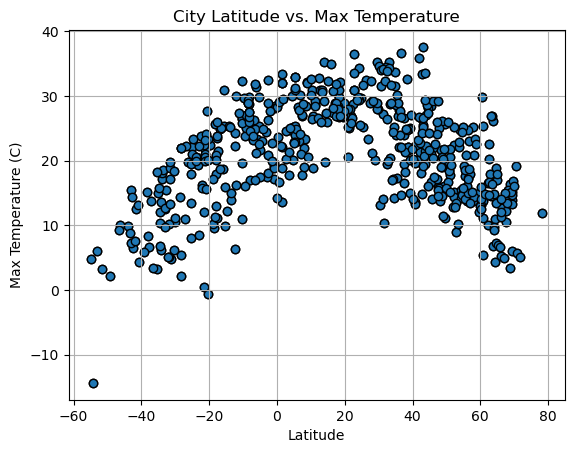

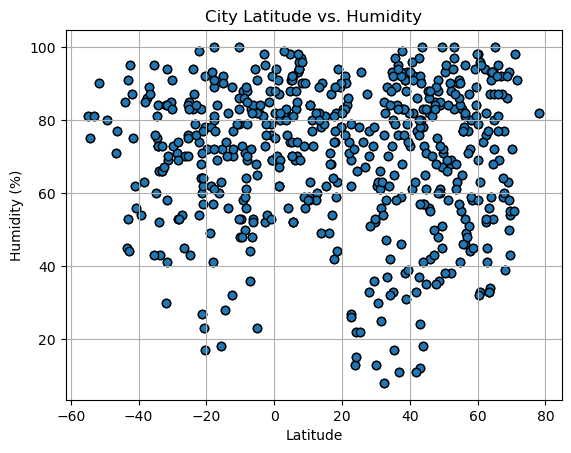

In [17]:
# Scatter plot: Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.show()

# Scatter plot: Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Similarly, create scatter plots for Cloudiness and Wind Speed


568


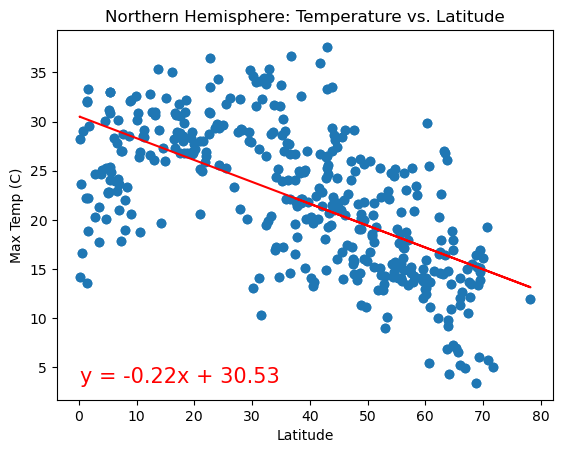

r-squared: 0.38531995887637727


In [19]:
# Define a function to create linear regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    print(f"r-squared: {rvalue**2}")

# Perform linear regression for Northern Hemisphere: Temperature vs. Latitude
northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"],
                       "Northern Hemisphere: Temperature vs. Latitude",
                       "Latitude", "Max Temp (C)")

# Repeat for Southern Hemisphere and other weather variables


In [21]:
# Create a map that displays a point for every city in the city_data_df DataFrame
humidity_map = city_data_df.hvplot.points("Lng", "Lat", geo=True, tiles="OSM",
                                          size="Humidity", color="Humidity", 
                                          hover_cols=["City", "Country", "Humidity"])
humidity_map


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City,Country)

In [23]:
# Set ideal weather conditions
ideal_cities = city_data_df[(city_data_df["Max Temp"] > 21) &
                            (city_data_df["Max Temp"] < 27) &
                            (city_data_df["Wind Speed"] < 4.5) &
                            (city_data_df["Cloudiness"] == 0)]

# Display filtered DataFrame
ideal_cities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
46,carnarvon,-24.8667,113.6333,23.40,43,0,3.87,AU,1723177592
51,korla,41.7597,86.1469,26.73,33,0,3.18,CN,1723177593
55,constantia,44.1833,28.6500,21.02,73,0,1.68,RO,1723177361
86,pleasanton,37.6624,-121.8747,21.82,68,0,3.60,US,1723177348
138,huesca,42.1362,-0.4087,21.38,77,0,0.51,ES,1723177601
146,saint-pierre,-21.3393,55.4781,21.82,60,0,1.54,RE,1723177493
147,patterson,37.4716,-121.1297,26.67,46,0,1.12,US,1723177602
194,prado,-17.3411,-39.2208,21.56,77,0,4.00,BR,1723177607
207,vedea,43.7833,25.7833,21.47,57,0,0.78,RO,1723177609
331,praia da vitoria,38.7333,-27.0667,22.14,88,0,0.43,PT,1723177621


In [25]:
# Base URL for Geoapify API
geoapify_base_url = "https://api.geoapify.com/v2/places?"

# Define your Geoapify API key
geoapify_api_key = "01d97dbb8bbe4d99985c4aa2c3af70ea"

# Create an empty list to hold hotel data
hotel_data = []

# Loop through each city and get the nearest hotel
for index, row in ideal_cities.iterrows():
    lat, lng = row["Lat"], row["Lng"]
    query_url = f"{geoapify_base_url}categories=accommodation.hotel&filter=circle:{lng},{lat},10000&apiKey={geoapify_api_key}"
    
    response = requests.get(query_url).json()
    try:
        hotel_data.append({
            "City": row["City"],
            "Country": row["Country"],
            "Lat": lat,
            "Lng": lng,
            "Hotel Name": response["features"][0]["properties"]["name"]
        })
    except (KeyError, IndexError):
        print(f"No hotel found near {row['City']}")

# Convert the hotel_data list into a DataFrame
hotel_df = pd.DataFrame(hotel_data)

# Display the DataFrame
hotel_df.head()


No hotel found near carnarvon
No hotel found near belyy yar
No hotel found near carnarvon
No hotel found near belyy yar


,City,Country,Lat,Lng,Hotel Name
0,korla,CN,41.7597,86.1469,Silver Star Hotel
1,constantia,RO,44.1833,28.6500,Golden Rose
2,pleasanton,US,37.6624,-121.8747,Pleasanton Marriott
3,huesca,ES,42.1362,-0.4087,Hotel ABBA Huesca
4,saint-pierre,RE,-21.3393,55.4781,La Villa Delisle


In [26]:
humidity_map = city_data_df.hvplot.points(
    "Lng", "Lat", geo=True, tiles="OSM", 
    size=city_data_df['Humidity'] * 0.1,  # Directly using the DataFrame column
    color="Humidity", 
    hover_cols=["City", "Country", "Humidity"]
)

